# Les donnés de l'American National Election Survey 2020 (ANES 2020)

Jusqu'à présent, vous avez utilisé les "notebooks" pour rédiger vos travaux...

Mais, ces "notebooks" sont extrêmeent puissants. Ils sont reliés à un super-ordinateur permettant d'effectuer des calculs de haute performance!

![](https://www.ctvnews.ca/polopoly_fs/1.4899418.1587069197!/httpImage/image.png_gen/derivatives/landscape_960/image.png)

In [26]:
# Chargement de la librarie d'analyse
import pandas as pd

# Importations des données
data_url = "https://raw.githubusercontent.com/datamisc/ts-2020/main/data.csv"
anes_data  = pd.read_csv(data_url, compression='gzip')
anes_data


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15,17,18,19,21,22,23,25,26,27,29,30,31,33,34,35,37,38,1508,1509) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,version,V200001,V160001_orig,V200002,V200003,V200004,V200005,V200006,V200007,V200008,V200009,V200010a,V200010b,V200010c,V200010d,V200011a,V200011b,V200011c,V200011d,V200012a,V200012b,V200012c,V200012d,V200013a,V200013b,V200013c,V200013d,V200014a,V200014b,V200014c,V200014d,V200015a,V200015b,V200015c,V200015d,V200016a,V200016b,V200016c,V200016d,V201001,...,V203401,V203402,V203403,V203404,V203405,V203406,V203410,V203411,V203412,V203413,V203414,V203415,V203416,V203500,V203501,V203502,V203503,V203504,V203505,V203506,V203508,V203509,V203510,V203511,V203512,V203513,V203514,V203515,V203516,V203517,V203518,V203519,V203520,V203521,V203522,V203523,V203524,V203525,V203526,V203527
0,ANES2020TimeSeries_20210719,200015,401318,3,2,3,0,-2,-2,-2,0,0.962809,1.00573747444017,2,9,0.689054,.880887099636969,2,9,,,,,,,,,,,,,,,,,0.996745,.973874052814516,2,9,1,...,-1,-1,-1,-1,-1,-1,-1. Inapplicable,-1,-1,-1,-1,-1,-1,21,-1. Inapplicable,-1,-1,-1. Inapplicable,-1,-1,Abby Broyles,2,James M. 'Jim' Inhofe,1,-1. Inapplicable,-1,-1,29,Mary Brannon,2,Thomas Jeffery 'Tom' Cole,1,-1. Inapplicable,-1,-1,82,-1. Inapplicable,-1,-1. Inapplicable,-1
1,ANES2020TimeSeries_20210719,200022,300261,3,2,3,0,4,-1,3,0,1.069085,1.16347312190926,2,26,1.08926,1.07183615863668,2,26,,,,,,,,,,,,,,,,,1.05886,1.1492021732751,2,26,1,...,-1,-1,-1,-1,-1,-1,-1. Inapplicable,-1,-1,-1,-1,-1,-1,21,-1. Inapplicable,-1,-1,-1. Inapplicable,-1,-1,Paulette Jordan,2,James E. 'Jim' Risch,1,-1. Inapplicable,-1,-1,29,Carlton Aaron Swisher,1,Michael Keith 'Mike' Simpson,1,-1. Inapplicable,-1,-1,-1,-1. Inapplicable,-1,-1. Inapplicable,-1
2,ANES2020TimeSeries_20210719,200039,400181,3,2,3,0,-2,-2,-2,0,0.683421,.768681110109909,1,41,0.688799,.609030746771271,1,41,,,,,,,,,,,,,,,,,0.681142,.756230992003099,1,41,1,...,-1,-1,-1,-1,-1,-1,-1. Inapplicable,-1,-1,-1,-1,-1,-1,12,-1. Inapplicable,-1,-1,-1. Inapplicable,-1,-1,Mark Robert Warner,1,Daniel MacArthur Gade,1,-1. Inapplicable,-1,-1,19,Elaine G. Luria,2,Scott William Taylor,1,-1. Inapplicable,-1,-1,81,-1. Inapplicable,-1,-1. Inapplicable,-1
3,ANES2020TimeSeries_20210719,200046,300171,3,2,3,0,-2,-2,-2,0,0.500953,.521019534357875,2,29,0.731815,.741575767882139,2,29,,,,,,,,,,,,,,,,,0.474365,.494633933446847,2,29,1,...,-1,-1,-1,-1,-1,-1,-1. Inapplicable,-1,-1,-1,-1,-1,-1,81,Dianne Feinstein,2,1,-1. Inapplicable,2,1,-1. Inapplicable,-1,-1. Inapplicable,-1,-1. Inapplicable,-1,-1,21,Phil Arballo,1,Devin Gerald Nunes,1,-1. Inapplicable,-1,-1,81,-1. Inapplicable,-1,-1. Inapplicable,-1
4,ANES2020TimeSeries_20210719,200053,405145,3,2,3,1,-2,-2,-2,0,1.262294,.965789166832749,1,23,1.01399,.942968665310746,1,23,,,,,,,,,,,,,,,,,1.26881,.934799353716296,1,23,1,...,-1,-1,-1,-1,-1,-1,-1. Inapplicable,-1,-1,-1,-1,-1,-1,21,-1. Inapplicable,-1,-1,-1. Inapplicable,-1,-1,John W. Hickenlooper,1,Cory Scott Gardner,1,-1. Inapplicable,-1,-1,29,Isaac Ian 'Ike' McCorkle,1,Kenneth R. 'Ken' Buck,1,-1. Inapplicable,-1,-1,81,-1. Inapplicable,-1,-1. Inapplicable,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8275,ANES2020TimeSeries_20210719,535315,-1,1,6,3,0,-2,-2,-2,0,1.052041,2.54194059520904,1,3,,,,,,,,,,,,,0.701441,1.79813939654805,1,3,0.673649,1.49145229866225,1,3,,,,,1,...,3,1,2,2,2,2,DC4913,3,1,1,2,2,3,82,Marco Rubio,1,2,Rick Scott,1,2,-1. Inapplicable,-1,-1. Inapplicable,-1,-1. Inapplicable,-1,-1,24,-1. Inapplicable,-1,Neal Patrick Dunn,1,-1. Inapplicable,-1,-1,82,-1. Inapplicable,-1,-1. Inapplicable,-1
8276,ANES2020TimeSeries_20210719,535360,-1,1,6,3,0,1,1,1,0,1.124100,.90712251661077,2,5,,,,,,,,,,,,,1.19977,1.17601864450073,2,5,1.15223,.975439231228371,2,5,,,,,1,...,3,3,2,2,1,3,DC3645,-2,-2,-2,-2,-2,-2,21,-1. Inapplicable,-1,-1,-1. Inapplicable,-1,-1,Paulette Jordan,2,James E. 'Jim' Risch,1,-1. Ina

In [53]:
# Sélection de variables
my_vars = [
    "V201032",  # vote
    "V201033",  # intentions
    "V201507x", # age
    "V201200",  # ideologie
]

df = anes_data[my_vars]
df.columns = ["vote", "intentions", "age", "ideologie"]
df

,vote,intentions,age,ideologie
0,1,2,46,6
1,1,3,37,4
2,1,1,40,2
3,1,1,41,3
4,1,2,72,5
...,...,...,...,...
8275,1,2,26,99
8276,1,2,52,6
8277,1,1,45,4
8278,-1,-1,65,6


vote
Non     0.072686
Oui     0.927314
dtype: float64


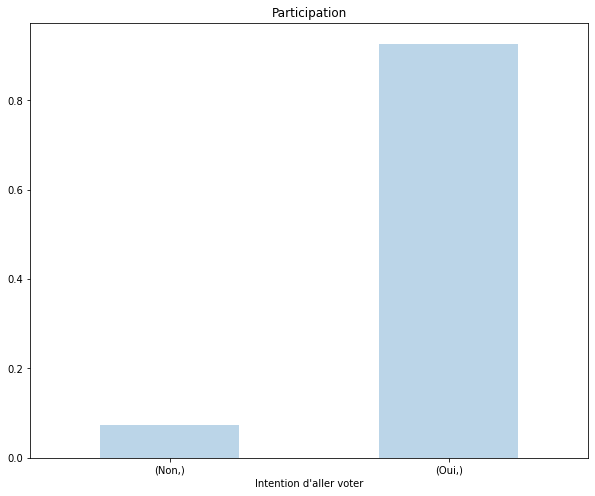

In [66]:
# Regardons à la participation
tmp = df.loc[df['vote'].between(1,2),['vote']].replace(
    {1:"Oui", 2:"Non"}
).value_counts(
    normalize=True,
).sort_index()

print(tmp)
tmp.plot(
    kind='bar', 
    title="Participation",
    figsize=(10,8),
    xlabel="Intention d'aller voter",
    alpha=.3,
    rot=0
);

In [67]:
# Un peu de ménage
mask = (df['age'] >= 18) & (df['ideologie'].between(1, 7)) & (df['intentions'].between(1,2))
df = df[mask]

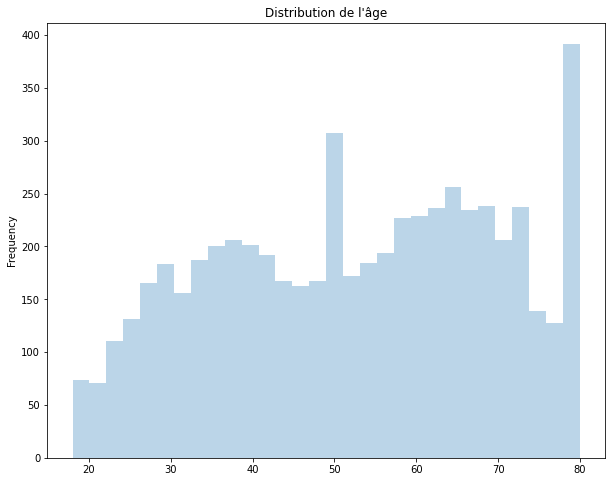

In [68]:
# Regardons à la distribution de l'âge des répondants
df['age'].plot(
    kind='hist', 
    bins=30, 
    title="Distribution de l'âge",
    figsize=(10,8),
    alpha=.3,
);


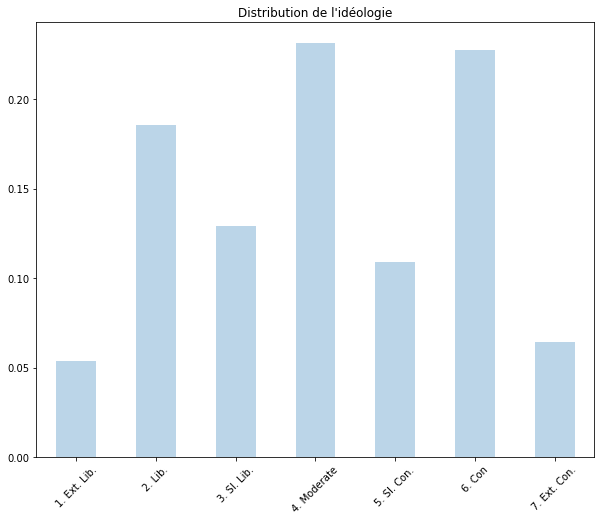

In [69]:
# Est-ce que l'électorat américain est idéologiquement polarisé?
df['ideologie'].replace(
    {1:"1. Ext. Lib.", 2:"2. Lib.", 3:"3. Sl. Lib.", 4:"4. Moderate", 5: "5. Sl. Con.", 6: "6. Con", 7: "7. Ext. Con."}
).value_counts(
    normalize=True
).sort_index().plot(
    kind='bar', 
    rot=45,
    title="Distribution de l'idéologie",
    figsize=(10,8),
    alpha=.3,
);


D.Trump    0.445429
J.Biden    0.554571
Name: intentions, dtype: float64


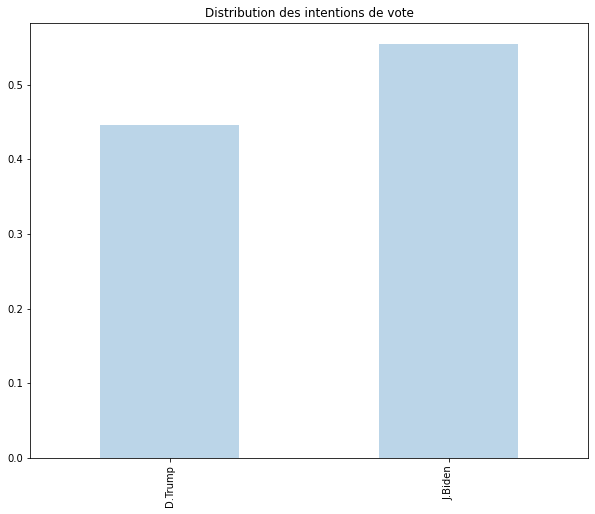

In [70]:
# Regardons aux intentions de vote
tmp = df['intentions'].replace(
    {1:"J.Biden", 2:"D.Trump"}
).value_counts(
    normalize=True
).sort_index()

print(tmp)
tmp.plot(
    kind='bar', 
    title="Distribution des intentions de vote",
    figsize=(10,8),
    alpha=.3,
);
